<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/lab_59_MNIST_keras_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# f-6-MNIST-keras
- 케라스를 이용한 MNIST

## 데이터 로드

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [3]:
train_images[0].max()   # 8-bit

255

In [4]:
type(train_images), type(train_images[0]), train_images[0].shape

(numpy.ndarray, numpy.ndarray, (28, 28))

In [5]:
type(train_labels), type(train_labels[0]), train_labels[0]

(numpy.ndarray, numpy.uint8, 5)

In [6]:
train_images.shape, train_labels.dtype

((60000, 28, 28), dtype('uint8'))

## MNIST 이미지 확인 및 데이터 전처리

In [ ]:
# train_images[0], train_images[0]/255

<function matplotlib.pyplot.show>

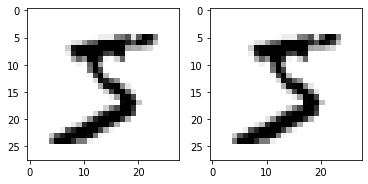

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plt.imshow(train_images[0]/255, cmap=plt.cm.binary)
plt.show

In [8]:
# just for checking
print(type(train_labels), train_labels[:10])
train_images.shape, train_labels.shape

<class 'numpy.ndarray'> [5 0 4 1 9 2 1 3 1 4]


((60000, 28, 28), (60000,))

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [10]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [11]:
print(train_labels[:10], type(train_labels), )

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] <class 'numpy.ndarray'>


## MLP(multi-layer perceptron) 로 구현(케라스 사용)

### Single flattened layer

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28*28*1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [11]:
# a single MLP layer
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape = (28*28*1, )))
model.summary()

model.compile(optimizer= 'rmsprop',             # set up hyperparamers
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=30, batch_size=256, verbose=2)

test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
235/235 - 3s - loss: 0.7797 - accuracy: 0.8099
Epoch 2/30
235/235 - 1s - loss: 0.3707 - accuracy: 0.8990
Epoch 3/30
235/235 - 1s - loss: 0.3236 - accuracy: 0.9100
Epoch 4/30
235/235 - 1s - loss: 0.3038 - accuracy: 0.9159
Epoch 5/30
235/235 - 1s - loss: 0.2924 - accuracy: 0.9184
Epoch 6/30
235/235 - 1s - loss: 0.2849 - accuracy: 0.9204
Epoch 7/30
235/235 - 1s - loss: 0.2787 - accuracy: 0.9219
Epoch 8/30
235/235 - 1s - loss: 0.2743 - accuracy: 0.9237
Epoch 9/30
235/235 - 1s - loss: 0.2711 - accuracy: 0.9245
Epoch 10/30
235/235 - 1s - loss: 0.2680 - accuracy: 0.9251
Epoch 11/30
235/235 - 1s - loss: 0.2657 - accuracy: 0.9259
Epoch 12

## MLP with hidden layers

In [21]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28*1, ))) # fully-connected
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.input)
print(model.output)
print(model.input_shape)
print(model.output_shape)
model.input.shape

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_27_input'), name='dense_27_input', description="created by layer 'dense_27_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_29/Softmax:0', description="created by layer 'dense_29'")
(None, 784)
(None, 10)


TensorShape([None, 784])

In [22]:
model.compile(optimizer= 'rmsprop',             # set up hyperparamers
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=30, batch_size=200) 

Epoch 1/30
300/300 [==============================] - 2s 4ms/step - loss: 0.3661 - accuracy: 0.8965
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.1648 - accuracy: 0.9513
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.1171 - accuracy: 0.9650
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9722
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9781
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9816
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9851
Epoch 8/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 9/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9889
Epoch 10/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9908

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1311 - accuracy: 0.9789
test_acc =  0.9789000153541565


## CNN 모델 생성

In [ ]:
# keras.layers.Conv2D(filters, kernel_size,...)
# - filters: the dimensionality of the output space (the number of output filters).
# - parameter 수: 입력채널수 X 필터폭 X 필터높이 X 출력채널수 
# - bias 도 고려

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [26]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# print(model.output_shape)

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
print(model.output_shape)

model.summary()   

(None, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)    

In [ ]:
# number of parameters
# conv2d_1 : 3*3*1*32 + 32 = 320
# conv2d_2 : 3*3*32*64 + 64 = 18496
# conv2d_3 : 3*3*64*64 + 64 = 36928
# dense_6 : 3*3*64*10 + 10 = 5770

## 훈련

In [27]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0119 - accuracy: 0.9964
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0105 - accuracy: 0.9967
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0088 - accuracy: 0.9974
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 9/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 10/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0057 - accuracy: 0.9983

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9934
test_acc =  0.993399977684021


(28, 28)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

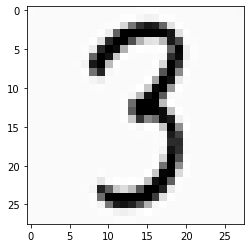

In [47]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
image = Image.open('num_3.png' ).convert('LA')
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='Greys')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28,28,1))

### what if we do not use deep learning model

In [16]:
# just for reference
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
X = train_images.astype('float32')/255         # scaling
y = train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45000, 784), (15000, 784), (45000,), (15000,))

In [19]:
clf = SGDClassifier(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9112
